In [ ]:
"""
Title: Sentiment Analysis on Airline Dataset

Authors: Meena Rapaka, Siva Naga Lakshmi Karamsetty, Ying Ke.

1.Introduction
The project is regarding analysis about the problems of each major U.S airline such as American Airlines, Delta, 
Southwest, United, US Airways, Virgin America. 
Twitter data was scraped from the airlines and is categorized into positive, negative and neutral tweets, followed 
by categorizing negative reasons further such as “delay” or “rude service”. 
The dataset is processed, and modelling techniques are applied further to get desired results.

Natural language processing techniques such as word clouds, bag of words, ngrams, sentiment analysis etc., are used to process the data. 
Also, machine learning techniques such as logistic regression, random forest, support vector machine, 
K-Nearest Neighbor, Decision tree are applied to predict the outcome variables. 
A baseline model, KNN classifier is performed to check the accuracy and use it as a baseline for rest our analysis. 
Then, we compute the accuracies for various models to recognize the best performing model among the different models we applied. 
We got the best accuracy for sentiment analysis with (insert method and accuracy).

Steps to Be followed:

1.Download the folder "AIT_690_MSY" and save it on desktop
2.






Algorithm

1.The Program will install all the required libraries and will read the CSV file.

2.we clean the dataset by removing unneccessary Columns like negativereason_gold and 
airline_sentiment_gold are removed.

3.As a part of data cleaning some rules are defined which extracts the exact meaning of the word and 
then we remove special character,remove URL and hashtags and converting words like "isn't to is not".

4.All the tweets are tokenized and will do lemmatizing for every word in the list, check for stop words and 
message will be appended to the "msg_list".

5.Mood of the tweets is assigned to variable X and mood count is assigned to varibale Y, for different airlines to
plot and see the distribution.

6.We visualize the distribution of counts for all the airlines.

7.All the negative tweets are also visualized using word cloud.

8.The sentiment is categorized as negative,neutral and positive in the dataset, we assign values to them
as 0,1,2 respectively.

9.All the clean tweets is assigned to new variable X, All the tweets sentiments are given to variable Y.

10.Now, We split the dataset in ratio of 80:20, where as training - 80% and testing - 20%.

11.Split the X and Y variables.

12.Make a new instance of TF-IDF vectorizer and pass parameters for an n-gram range of (1,3)

13.This ngrams_range is for feature selection is given (1,1) it will only select unigrams, 
(2,2) only bigrams, (3,3) only trigrams, (1,2) unigrams and bigrams, (1,3) unigrams, bigrams and trigrams.

14.Fit our training data tweets to vector, transforming training and testing data tweets.

15.Import SVM and other classifiers and fit the training and test data to the model

16.Do 10-fold cross validation on the training data and calculates mean accuracy.

17.Predict the sentiments of testing data and calculates the accuracy of predicted data sentiment with original
tweet sentiment of test data.

18.It iterates from step 15-17 for other classifers.

19.We calculate top-10 and last-10 words for the logisitic regression model.

"""






In [1]:
import numpy as  np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

from textblob import TextBlob
from autocorrect import spell
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
Tweet = pd.read_csv("../twitter/Tweets.csv")#Reads the input file from the file location.
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,NaN,Pacific Time (US & Canada)


In [3]:
del Tweet['tweet_coord']#null values columns are deleted.
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [4]:
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2/24/15 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,NaN,Pacific Time (US & Canada)


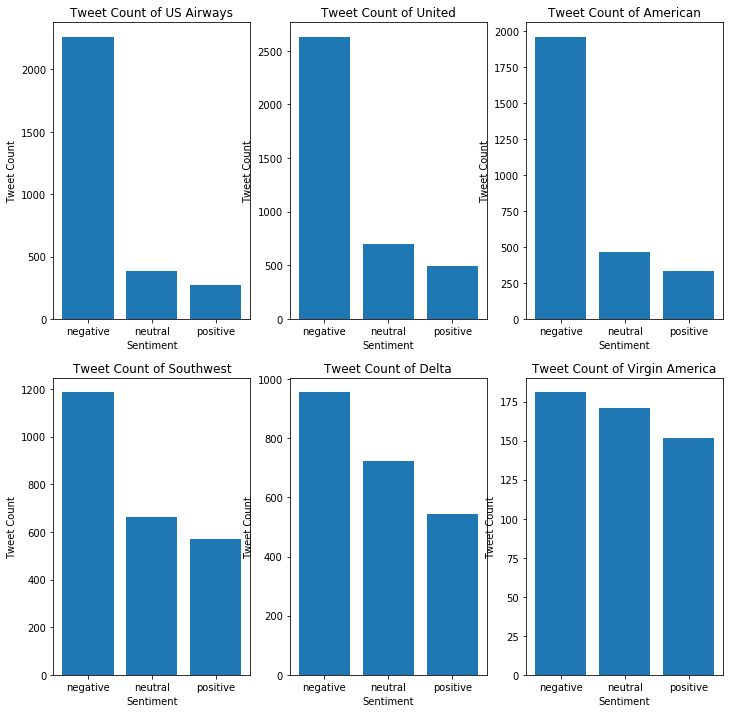

In [5]:
#plot_sentiment function is defined to visualize the 6 different airlines for the different emotions.
def plot_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Tweet Count')
    plt.xlabel('Sentiment')
    plt.title('Tweet Count of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sentiment('US Airways')
plt.subplot(232)
plot_sentiment('United')
plt.subplot(233)
plot_sentiment('American')
plt.subplot(234)
plot_sentiment('Southwest')
plt.subplot(235)
plot_sentiment('Delta')
plt.subplot(236)
plot_sentiment('Virgin America')

In [6]:
#decontracted function will expand the english words like haven't to have not.
def decontracted(phrase):
    phrase = re.sub(r"n\'t", "not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", "would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", "not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

list3=[]
#it will remove special characters.
def  remove_characters(sentence):
    y=sentence.split(" ")
    s=' '
    list2=[]
    for i in y:
        i=i.lower()
        if re.search('[^a-zA-Z0-9.$]',i):
            pass
        else:
            list2.append(i)
    x=s.join(list2)
    list3.append(x)
    return x
# it will remove the URL from the tweets
def url(msg):
    msg= re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', msg)
    return msg

#def sentimentsc(words):
   # sentimentScore = 0
  #  for word in words.split():        
  #      ind = sentimentDictionary[(sentimentDictionary['word'] == word)].index.tolist()
  #      if len(ind) != 0:
   #         sentimentScore = sentimentScore + float(sentimentDictionary.loc[ind]['score'])
   # return sentimentScore

In [7]:
ps = PorterStemmer()#stemmer function is defined.
lemmatizer = WordNetLemmatizer()#lemmatizer function is defined.
stwords = stopwords.words('english')#stopwords function is defined and calling the function.
#stwords.remove('not')
#stwords.remove('no')

In [8]:
d=Tweet['text']# tweet is called into the variable d.
corpus=[]
null_index=[]

#sentimentDictionary = pd.read_table('../twitter/AFINN-111.txt',sep=',', names = ['word','score'])
#
#sentimentDictionary = pd.read_table('sentiword.txt',sep=',', names = ['word','score'])
#
#c=sentimentDictionary['word'].str.split('#',n=3)
#
#d=sentimentDictionary['word'].str.split('\t',n=3)

In [9]:
msg_list = []# empty list is passed.
for i in range(0,len(d)):  
    msg=str(d[i])
    msg = decontracted(msg)# decontracted function is called here. 
    msg = msg.lower() #tweets are converted to lower case.
    msg = remove_characters(msg)# it will remove the special characters 
    msg = url(msg)#it will remove the url from the tweets.     
    msg = word_tokenize(msg)# tweet is tokenized here.
    msg = [i2 for i2 in msg if i2.isalpha()]    
    msg = [lemmatizer.lemmatize(word, pos= "a") for word in msg if not word in set(stwords) ]
    msg = [spell(word) for word in msg]
    msg = [word for word in msg if not word in set(stwords)]
    msg = ' '.join(msg)
    #print(msg)
    msg_list.append(msg)
#print(msg_list)
    

In [11]:
#clean_df = pd.DataFrame(clean_df1,columns=['text'])
clean_msg = pd.DataFrame(msg_list,columns=['text'])
clean_msg.head()
#print(clean_msg)# tweets are passed to variable X.
X=clean_msg.text
#sentiments are assigned the label negative, neutral and positive as 0,1,2 respectively.
Tweet['sentiment'] = Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else (1 if x== 'neutral' else 2))
Y=Tweet.sentiment#tweets sentiment labels are assigned to variable Y.
print(Y)
#print(Y.shape)
#print(X.shape)
#print(df)



0        1
1        2
2        1
3        0
4        0
5        0
6        2
7        1
8        2
9        2
10       1
11       2
12       2
13       2
14       2
15       0
16       2
17       0
18       2
19       2
20       0
21       2
22       2
23       1
24       0
25       0
26       0
27       1
28       0
29       1
        ..
14610    0
14611    1
14612    0
14613    0
14614    0
14615    0
14616    0
14617    2
14618    0
14619    2
14620    0
14621    0
14622    0
14623    2
14624    0
14625    2
14626    0
14627    0
14628    2
14629    0
14630    2
14631    0
14632    1
14633    0
14634    0
14635    2
14636    0
14637    1
14638    0
14639    1
Name: sentiment, Length: 14640, dtype: int64


In [12]:
# the data is splitted into training and testing data with the ratio of 80:20 percent respectively.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
#print(train)
#print(test)
#print(Y_train)

In [13]:
#Get Tf-idf object and save it as vect. features will be selected.
#the ngram range to change the features.
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(analyzer = "word",min_df=0.0004,max_df=0.115, ngram_range=(1,3))
vect.fit(X_train) # fit or traing data tweets to vect
X_train_dtm = vect.transform(X_train)#transforming training data
X_test_dtm = vect.transform(X_test)#transforming test data

In [14]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC#imports SVM classifier from sklearn.svm
from sklearn.metrics import accuracy_score
svmclassifier = SVC(kernel = 'rbf', random_state =19 )
svmclassifier.fit(X_train_dtm,Y_train)
Y_pred = svmclassifier.predict(X_test_dtm)
print(accuracy_score(Y_test,Y_pred))
#imports the confusion matrix from sklearn metrics.
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test, Y_pred) 
print(cm)
#import classification report where it will print the precision recall and support.
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)

/Users/lakshmi_shetty/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6451502732240437
[[1889    0    0]
 [ 580    0    0]
 [ 459    0    0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.78      1889
           1       0.00      0.00      0.00       580
           2       0.00      0.00      0.00       459

   micro avg       0.65      0.65      0.65      2928
   macro avg       0.22      0.33      0.26      2928
weighted avg       0.42      0.65      0.51      2928



/Users/lakshmi_shetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = svmclassifier, X = X_train_dtm, y = Y_train, cv = 10) 
#K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() 

/Users/lakshmi_shetty/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6223533265904806

In [16]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
treeclassifier = DecisionTreeClassifier(criterion = 'gini', random_state = 8, splitter = 'random')
treeclassifier.fit(X_train_dtm, Y_train)
#prediction
Y_pred = treeclassifier.predict(X_test_dtm)
print(accuracy_score(Y_test,Y_pred))
#imports the confusion matrix from sklearn metrics.
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test, Y_pred) 
print(cm)
#import classification report where it will print the precision recall and support.
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)


0.7226775956284153
[[1580  191  118]
 [ 214  290   76]
 [ 138   75  246]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1889
           1       0.52      0.50      0.51       580
           2       0.56      0.54      0.55       459

   micro avg       0.72      0.72      0.72      2928
   macro avg       0.63      0.62      0.63      2928
weighted avg       0.72      0.72      0.72      2928



In [17]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = treeclassifier, X = X_train_dtm, y = Y_train, cv = 10)
#K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() 

0.7016707260395239

In [18]:
#Fitting Kneighbor classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
kclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
kclassifier.fit(X_train_dtm, Y_train)
#prediction
Y_pred = kclassifier.predict(X_test_dtm)
print(accuracy_score(Y_test,Y_pred))
#imports the confusion matrix from sklearn metrics.
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test, Y_pred) 
print(cm)
#import classification report where it will print the precision recall and support.
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)


0.41598360655737704
[[703 939 247]
 [174 344  62]
 [ 94 194 171]]
              precision    recall  f1-score   support

           0       0.72      0.37      0.49      1889
           1       0.23      0.59      0.33       580
           2       0.36      0.37      0.36       459

   micro avg       0.42      0.42      0.42      2928
   macro avg       0.44      0.45      0.40      2928
weighted avg       0.57      0.42      0.44      2928



In [19]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = kclassifier, X = X_train_dtm, y = Y_train, cv = 10) 
#K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() 

0.40966075650188644

In [20]:
#Fitting random forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ranclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 19)
ranclassifier.fit(X_train_dtm, Y_train)
#prediction
Y_pred = ranclassifier.predict(X_test_dtm)
print(accuracy_score(Y_test,Y_pred))
#imports the confusion matrix from sklearn metrics.
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test, Y_pred) 
print(cm)
#import classification report where it will print the precision recall and support.
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)


0.7476092896174863
[[1686  146   57]
 [ 257  258   65]
 [ 152   62  245]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1889
           1       0.55      0.44      0.49       580
           2       0.67      0.53      0.59       459

   micro avg       0.75      0.75      0.75      2928
   macro avg       0.68      0.62      0.64      2928
weighted avg       0.73      0.75      0.74      2928



In [21]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = ranclassifier, X = X_train_dtm, y = Y_train, cv = 10) 
# K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() 

0.7345437423568872

In [22]:
#Fitting Logistic regression model to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logclassifier = LogisticRegression(random_state = 19, penalty = 'l1')
lr=logclassifier.fit(X_train_dtm, Y_train)
#prediction
Y_pred = logclassifier.predict(X_test_dtm)
print(accuracy_score(Y_test,Y_pred))
#imports the confusion matrix from sklearn metrics.
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test, Y_pred) 
print(cm)
#import classification report where it will print the precision recall and support.
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)


0.7691256830601093
[[1773   77   39]
 [ 328  219   33]
 [ 153   46  260]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1889
           1       0.64      0.38      0.48       580
           2       0.78      0.57      0.66       459

   micro avg       0.77      0.77      0.77      2928
   macro avg       0.74      0.63      0.66      2928
weighted avg       0.76      0.77      0.75      2928



/Users/lakshmi_shetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lakshmi_shetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [23]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = logclassifier, X = X_train_dtm, y = Y_train, cv = 10) 
#K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() 

/Users/lakshmi_shetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lakshmi_shetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7441056657882056

In [24]:
#import Multinomial Naive Bayes model from sklearn.naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nbmodel=MultinomialNB(alpha=0.5)
nbmodel=nbmodel.fit(X_train_dtm,Y_train)
Y_pred=nbmodel.predict(X_test_dtm)
print(accuracy_score(Y_test,Y_pred))
#imports the confusion matrix from sklearn metrics.
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test, Y_pred) 
print(cm)
#import classification report where it will print the precision recall and support.
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)


0.7506830601092896
[[1814   56   19]
 [ 379  171   30]
 [ 212   34  213]]
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1889
           1       0.66      0.29      0.41       580
           2       0.81      0.46      0.59       459

   micro avg       0.75      0.75      0.75      2928
   macro avg       0.74      0.57      0.61      2928
weighted avg       0.74      0.75      0.72      2928



In [25]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = nbmodel, X = X_train_dtm, y = Y_train, cv = 10) 
#K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() 

0.7344584136370055

In [26]:
#imports countvectorier and TFIDvectorizer from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#gives top-10 and last-10 words for the logistic regression model
words= vect.get_feature_names()
co=lr.coef_.tolist()[0]
coeff=pd.DataFrame({'word':words,'coeff':co})
coeffdf=coeff.sort_values(['coeff','word'],ascending=[0,1])
print('top ten',coeffdf.head(10))
print('last ten',coeffdf.tail(10))

top ten          coeff        word
1597  8.049146       hours
211   7.773622         bad
724   6.440678     delayed
1079  6.434318         fix
2585  5.789356        rude
2558  5.607522  ridiculous
1583  5.400114        hour
2900  5.082695      system
1895  4.929430     luggage
721   4.840860       delay
last ten          coeff         word
1879 -3.500037         love
965  -3.544892    excellent
417  -3.925138  cannot wait
90   -3.941520      amazing
1744 -4.066048        kudos
197  -4.290605      awesome
1446 -4.629987        great
3337 -4.738854      worries
2957 -5.088449       thanks
2949 -7.518947        thank


In [27]:
from wordcloud import WordCloud,STOPWORDS#imports wordcloud for wordcloud.

In [28]:
#Wordcloud for the negative tweets.
df=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
clean_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [29]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(clean_word)

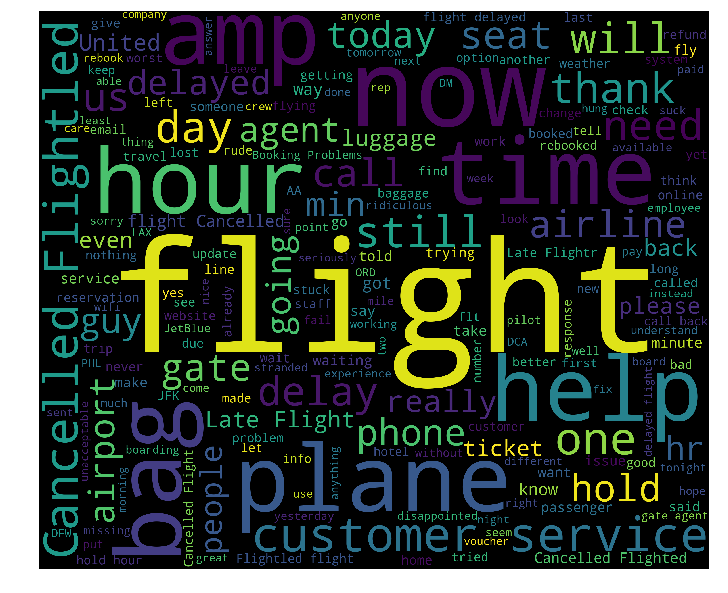

In [30]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()